<a href="https://colab.research.google.com/github/Surajitds/BostonHousePredictions/blob/main/SURAJITCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Step 1: Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Find and print the shape of the data
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


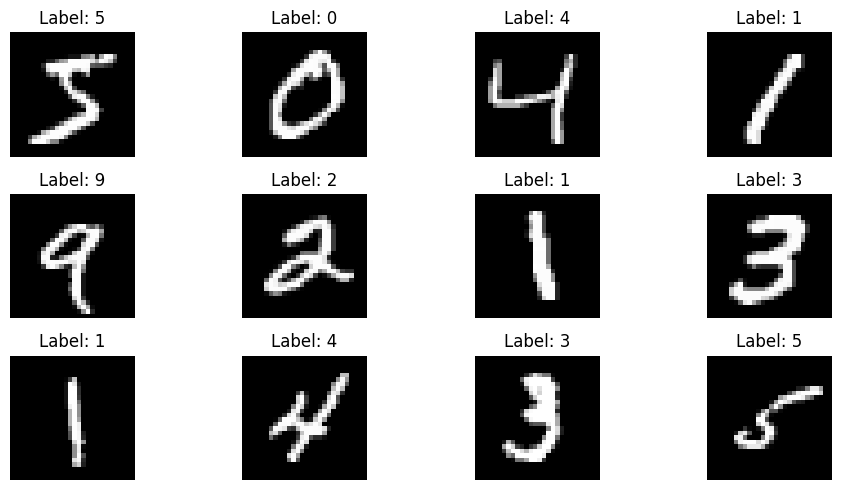

In [ ]:
# Plot the first 12 images from the training dataset
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

In [ ]:
# Reshape the images to include a channel dimension (since they are grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
# Check and print the shape of the reshaped images
print("Shape of reshaped train_images:", train_images.shape)
print("Shape of reshaped test_images:", test_images.shape)

Shape of reshaped train_images: (60000, 28, 28, 1)
Shape of reshaped test_images: (10000, 28, 28, 1)


In [ ]:
# Step 2: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


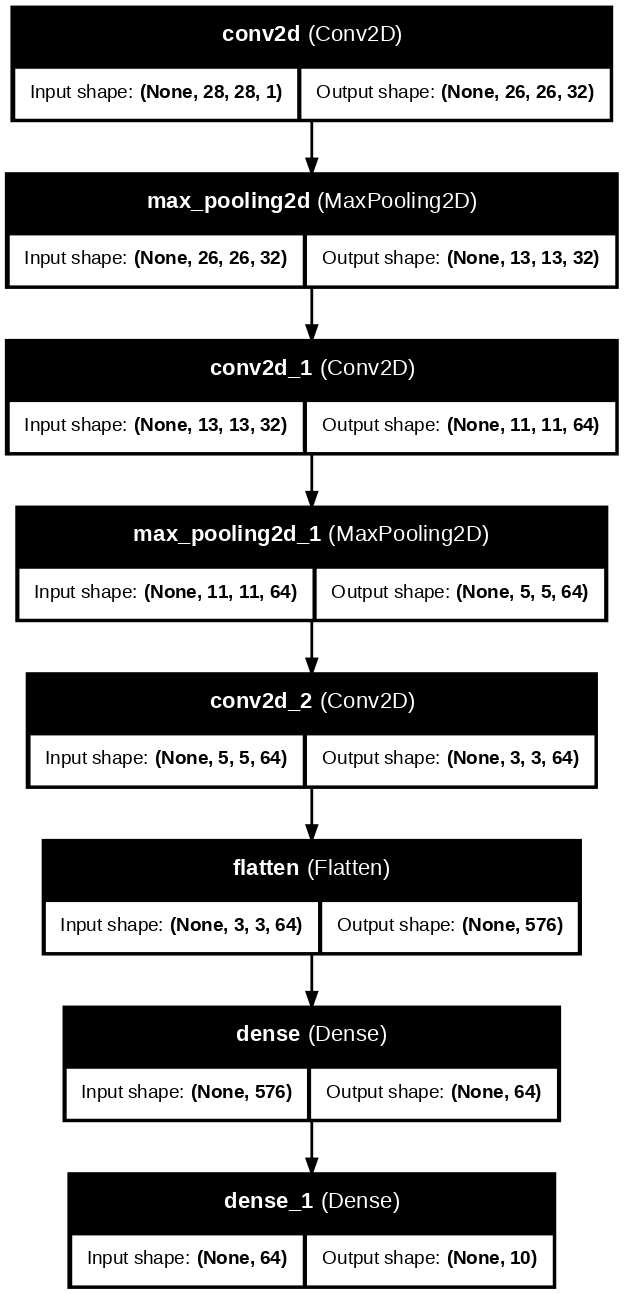

In [ ]:
from tensorflow.keras.utils import plot_model
# Plot the model architecture with a higher DPI to reduce image size
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=100)



In [ ]:
# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 4: Train the Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8860 - loss: 0.7632 - val_accuracy: 0.9783 - val_loss: 0.0711
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0689 - val_accuracy: 0.9758 - val_loss: 0.0759
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.9802 - val_loss: 0.0650
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9877 - loss: 0.0399 - val_accuracy: 0.9880 - val_loss: 0.0426
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9847 - val_loss: 0.0544


In [ ]:
# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.9847 - loss: 0.0544
Test accuracy: 0.9847000241279602


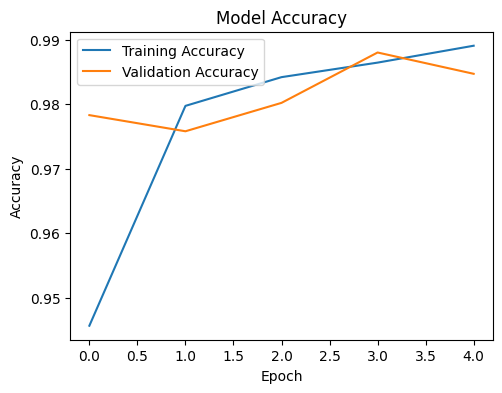

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

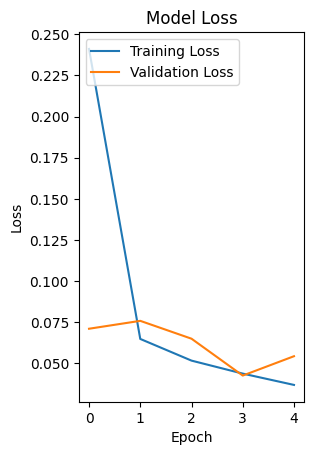

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


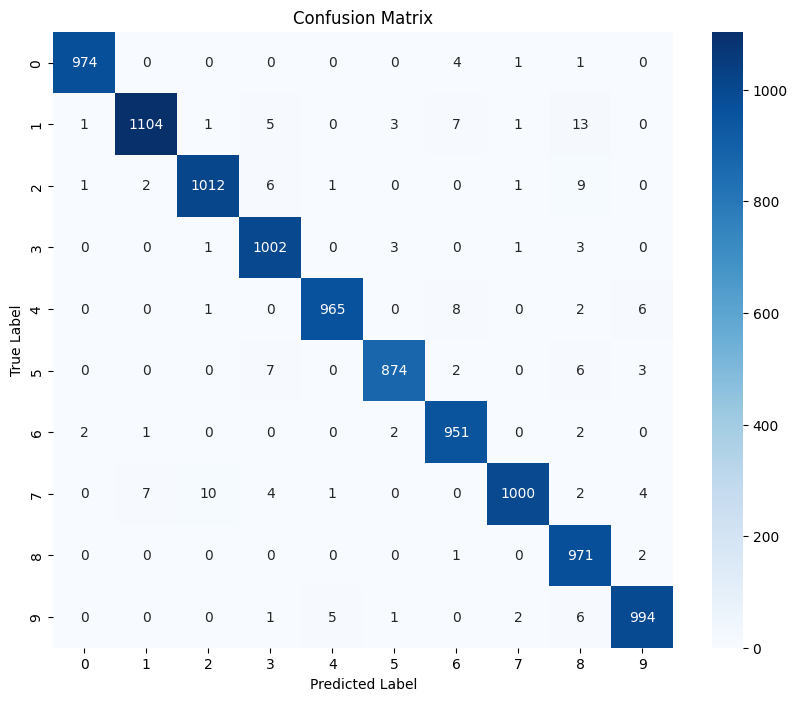

In [ ]:
pred_labels = np.argmax(model.predict(test_images), axis=1)
conf_matrix = confusion_matrix(test_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

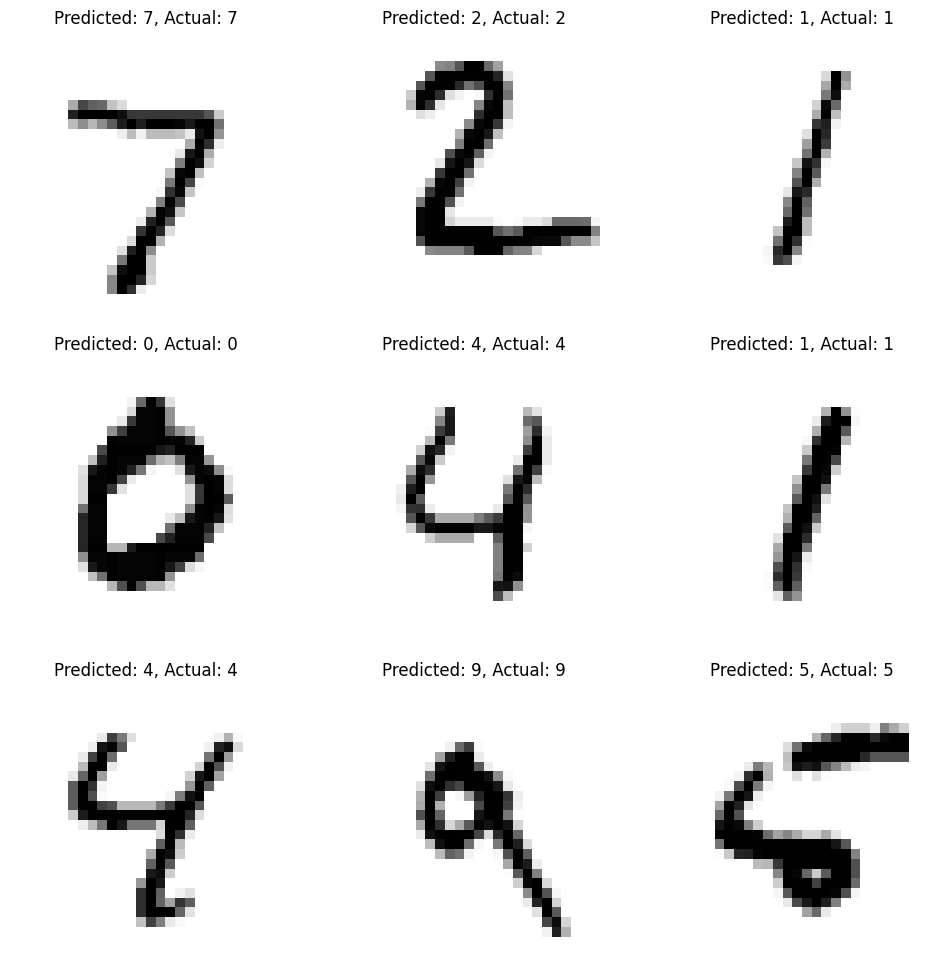

In [ ]:
# Step 8: Display Sample Predictions

def display_sample_predictions(test_images, test_labels, pred_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"Predicted: {pred_labels[i]}, Actual: {test_labels[i]}")
        plt.axis('off')
    plt.show()

# Display sample predictions
display_sample_predictions(test_images, test_labels, pred_labels)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the images
train_images_flattened = train_images.reshape((train_images.shape[0], -1))
test_images_flattened = test_images.reshape((test_images.shape[0], -1))

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the number of neighbors
knn.fit(train_images_flattened, train_labels)  # Make sure you have train_labels

# Make predictions
test_predictions = knn.predict(test_images_flattened)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_predictions)  # Make sure you have test_labels
print(f"KNN Accuracy: {accuracy:.2f}")


KNN Accuracy: 0.97


**SVM**

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets
from tensorflow.image import resize

# Step 1: Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reduce the dataset size to speed up training
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:2000]
test_labels = test_labels[:2000]

# Flatten the images to 1D (required for SVM) and normalize pixel values (0-255 to 0-1)
train_images = train_images.reshape((train_images.shape[0], -1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], -1)).astype('float32') / 255.0

# Step 2: Train the SVM Model (this may take some time)
svm_model = svm.SVC(kernel='linear', C=1, random_state=42)  # Linear kernel for multiclass classification
svm_model.fit(train_images, train_labels)

# Step 3: Make Predictions
svm_predictions = svm_model.predict(test_images)

# Step 4: Calculate Accuracy
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Accuracy on MNIST: {svm_accuracy:.2f}")


SVM Accuracy on MNIST: 0.90


**GoogLeNet (Inception v1)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from sklearn.metrics import accuracy_score

# Step 1: Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reduce the dataset size to speed up training
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:2000]
test_labels = test_labels[:2000]

# Reshape the data to include a channel dimension (grayscale to RGB)
train_images = np.stack([train_images] * 3, axis=-1)  # Convert grayscale to RGB by stacking
test_images = np.stack([test_images] * 3, axis=-1)

# Resize the images to (299, 299) as required by InceptionV3
train_images = np.array([resize(img, (299, 299)).numpy() for img in train_images])
test_images = np.array([resize(img, (299, 299)).numpy() for img in test_images])

# Normalize the pixel values (from range 0-255 to 0-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 2: Load the InceptionV3 Model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Step 3: Add custom layers on top of the InceptionV3 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pool the output of the base model
x = Dense(256, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(10, activation='softmax')(x)  # Output layer with 10 classes (MNIST has 10 digits)

# Step 4: Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Freeze the layers of the base model (InceptionV3)
for layer in base_model.layers:
    layer.trainable = False

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model (fewer epochs and larger batch size for speed)
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Step 8: Evaluate the model and make predictions
inception_predictions = model.predict(test_images)
inception_predicted_classes = np.argmax(inception_predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Step 9: Calculate the accuracy
inception_accuracy = accuracy_score(true_classes, inception_predicted_classes)
print(f"InceptionV3 (GoogLeNet) Accuracy on MNIST: {inception_accuracy:.2f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 393ms/step - accuracy: 0.7334 - loss: 0.8364 - val_accuracy: 0.8905 - val_loss: 0.3298
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 249ms/step - accuracy: 0.9347 - loss: 0.2127 - val_accuracy: 0.9205 - val_loss: 0.2392
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - accuracy: 0.9432 - loss: 0.1856 - val_accuracy: 0.9310 - val_loss: 0.2145
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - accuracy: 0.9607 - loss: 0.1218 - val_accuracy: 0.9400 - val_loss: 0.1852
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - accuracy: 0.9684 - loss: 0.1028 - val_accuracy: 0.9340 - val_loss: 0.2004
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step
InceptionV3 (GoogLeNet) Accuracy on MNIST: 0.93


**ResNet-50**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from sklearn.metrics import accuracy_score

# Step 1: Load and Preprocess the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reduce the dataset size to speed up training
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:2000]
test_labels = test_labels[:2000]

# Reshape the data to include a channel dimension (grayscale to RGB)
train_images = np.stack([train_images] * 3, axis=-1)  # Convert grayscale to RGB by stacking
test_images = np.stack([test_images] * 3, axis=-1)

# Resize the images to (224, 224) as required by ResNet50
train_images = np.array([resize(img, (224, 224)).numpy() for img in train_images])
test_images = np.array([resize(img, (224, 224)).numpy() for img in test_images])

# Normalize the pixel values (from range 0-255 to 0-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 2: Load the ResNet50 Model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Add custom layers on top of the ResNet50 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pool the output of the base model
x = Dense(256, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(10, activation='softmax')(x)  # Output layer with 10 classes (MNIST has 10 digits)

# Step 4: Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Freeze the layers of the base model (ResNet50)
for layer in base_model.layers:
    layer.trainable = False

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model (fewer epochs and larger batch size for speed)
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Step 8: Evaluate the model and make predictions
resnet_predictions = model.predict(test_images)
resnet_predicted_classes = np.argmax(resnet_predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Step 9: Calculate the accuracy
resnet_accuracy = accuracy_score(true_classes, resnet_predicted_classes)
print(f"ResNet50 Accuracy on MNIST: {resnet_accuracy:.2f}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 237ms/step - accuracy: 0.2534 - loss: 2.1420 - val_accuracy: 0.5175 - val_loss: 1.4865
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - accuracy: 0.6102 - loss: 1.3923 - val_accuracy: 0.7425 - val_loss: 1.0132
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 185ms/step - accuracy: 0.7377 - loss: 0.9825 - val_accuracy: 0.7795 - val_loss: 0.7980
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.7912 - loss: 0.7831 - val_accuracy: 0.8110 - val_loss: 0.6528
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 187ms/step - accuracy: 0.8196 - loss: 0.6440 - val_accuracy: 0.8290 - val_loss: 0.5982
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step
ResNet50 Accuracy on MNIST: 0.83
